## Case Study - Credit Risk Prediction

### Business Problem

Credit risk prediction is a crucial aspect of financial decision-making for businesses, particularly those involved in lending or providing credit to customers. Here's a business use case for credit risk prediction.
Higher interest rates continue to challenge speculative-grade issuers seeking to address near-term maturities and other liquidity related stresses, Fitch Ratings says. Increased interest burdens will put downward pressure on FCF and limit financial flexibility, posing an outsized risk for issuers already constrained by the macroeconomic operating environment.With Treasury and corporate yields signaling higher for even longer rates ahead, we expect the U.S. trailing-12-month speculative-grade corporate default rate to reach 5% (86 defaults) by September 2024, from 4.1% in September 2023

### Business Objective
A financial institution aims to optimize its lending process by implementing a credit risk prediction model to assess the likelihood of default for loan applicants. The goal is to make informed decisions, minimize bad debts, and enhance overall portfolio performance.

### Approach
Developing an effective credit risk prediction model involves a systematic approach that combines data science, domain knowledge, and a commitment to continuous improvement. Here's a step-by-step approach:

##Define Objectives and Scope:

Clearly articulate the goals of the credit risk prediction model. Determine the types of loans or credit products it will assess and the specific outcomes it aims to predict (e.g., default/non-default).

##Data Collection and Preparation:

Gather historical data on loan applicants, including both those who defaulted and those who repaid successfully. Incorporate relevant features such as credit history, income, employment stability, debt levels, and other financial indicators.
Clean and preprocess the data, handling missing values, outliers, and ensuring data consistency.

##Feature Selection and Engineering:

Identify the most relevant features for credit risk assessment. This may involve using domain knowledge, statistical methods, or machine learning techniques.
Create new features if needed, such as debt-to-income ratios, credit utilization, or other derived metrics that could enhance predictive power.

##Model Selection:

Choose appropriate machine learning algorithms based on the nature of the problem. Common choices include logistic regression, decision trees, random forests, support vector machines, or neural networks.
Experiment with multiple models and compare their performance to select the most suitable one.

##Training the Model:

Split the dataset into training and validation sets to train and evaluate the model's performance.
Fine-tune model parameters to achieve optimal predictive accuracy and generalization to new data.

##Validation and Testing:

Validate the model on a separate dataset not used during training to assess its performance on unseen data.
Test the model against real-world scenarios to ensure its effectiveness in practical applications.

##Implementation:

Integrate the credit risk prediction model into the loan approval process. Develop a scoring system to categorize applicants into risk categories.
Ensure seamless integration with existing systems, making the process efficient and user-friendly.

##Monitoring and Maintenance:

Implement a system for real-time monitoring of the model's performance and borrower behavior.
Regularly update the model using new data to adapt to changing patterns and maintain accuracy.

##Interpretability and Explainability:

Ensure the model's predictions are interpretable and explainable to build trust among stakeholders. This is especially important in regulated industries.

##Feedback Loop and Continuous Improvement:

Establish a feedback loop for continuous improvement. Gather feedback from loan performance, monitor model accuracy, and refine the model as needed.

##Compliance:

Ensure that the credit risk prediction model complies with relevant regulations and ethical standards. This is crucial, especially in the financial industry.



### Import modules

In [3]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import io
import os
from google.colab import files

import matplotlib.pyplot as plt
import seaborn as sns


# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
uploaded = files.upload()

Saving new_train.csv to new_train.csv


### Load the Data

In [5]:
# Importing all datasets
credit_data = pd.read_csv("new_train.csv")

In [7]:
print(credit_data.shape)
#print(credit_data.head())

(32950, 16)


#### Display the columns in chunk using info

In [8]:

credit_data1= credit_data[credit_data.columns[0:100]]
credit_data1.info()
credit_data1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null  int64 
 14  poutcome     32950 non-null  object
 15  y            32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


### Clean the data

Preprocess data (convert columns to appropriate formats, handle missing values, etc.)


In [11]:
credit_data.info()
credit_data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null  int64 
 14  poutcome     32950 non-null  object
 15  y            32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB


(32950, 16)

In [14]:
#Describing Numerical value
credit_data.describe()

,age,duration,campaign,pdays,previous
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,40.014112,258.127466,2.560607,962.052413,0.174719
std,10.403636,258.975917,2.752326,187.951096,0.499025
min,17.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000


In [16]:
#Describing Categorical value
print(credit_data.describe(include = 'object'))

           job  marital          education default housing   loan   contact  \
count    32950    32950              32950   32950   32950  32950     32950   
unique      12        4                  8       3       3      3         2   
top     admin.  married  university.degree      no     yes     no  cellular   
freq      8314    19953               9736   26007   17254  27131     20908   

        month day_of_week     poutcome      y  
count   32950       32950        32950  32950  
unique     10           5            3      2  
top       may         thu  nonexistent     no  
freq    11011        6857        28416  29238  


### Handling Missing Values

In [17]:
# DATA CLEANUP - Check missing values check % of missing value to decide
pd.set_option('display.max_columns', None)

print("----------------------------------------------------\n")
print("Missing Values in the dataframe: \n", credit_data.isnull().sum())

----------------------------------------------------

Missing Values in the dataframe: 
 age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64


In [18]:
## Looking at the data from columnwise record
credit_data.sample(10).T

,15034,28885,10219,20936,12803,30724,22918,293,8271,23033
age,48,34,43,33,45,24,31,55,40,34
job,services,admin.,technician,unemployed,management,blue-collar,admin.,retired,blue-collar,admin.
marital,married,single,married,single,divorced,married,married,married,married,married
education,high.school,university.degree,basic.9y,university.degree,university.degree,basic.9y,university.degree,university.degree,basic.9y,basic.6y
default,no,no,unknown,no,no,no,no,unknown,unknown,no
housing,yes,yes,yes,no,no,no,no,no,unknown,yes
loan,yes,no,no,no,no,no,no,no,unknown,no
contact,cellular,cellular,telephone,cellular,telephone,cellular,cellular,telephone,telephone,cellular
month,aug,aug,may,nov,jun,jul,jun,may,jun,may
day_of_week,mon,mon,tue,thu,mon,wed,thu,thu,mon,wed


In [20]:
# percentage of missing values in each column
print("Missing Values in the dataframe: \n")
round(credit_data.isnull().sum()/len(credit_data.index), 2)*100

# The above is not showing the entire list, hence lets break down - displaying the columns having more than 90% missing values
missing_columns = credit_data.columns[100*(credit_data.isnull().sum()/len(credit_data.index)) > 70]
print(missing_columns)

Missing Values in the dataframe: 

Index([], dtype='object')


In [21]:
credit_data.describe()

,age,duration,campaign,pdays,previous
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,40.014112,258.127466,2.560607,962.052413,0.174719
std,10.403636,258.975917,2.752326,187.951096,0.499025
min,17.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000


In [23]:
## Converting target variable to 0, 1
credit_data['target'] = credit_data['y'].apply(lambda x: 1 if x== "yes" else 0)
credit_data.drop(['y'], axis=1, inplace = True)
credit_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'target'],
      dtype='object')

### Separate the numerical columns & Categorical columns for dummy/ encoding.

#### Separate the categorical variables to different data set

In [24]:
# subset all categorical variables
credit_categorical = credit_data.select_dtypes(include=['object'])
credit_categorical.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   job          32950 non-null  object
 1   marital      32950 non-null  object
 2   education    32950 non-null  object
 3   default      32950 non-null  object
 4   housing      32950 non-null  object
 5   loan         32950 non-null  object
 6   contact      32950 non-null  object
 7   month        32950 non-null  object
 8   day_of_week  32950 non-null  object
 9   poutcome     32950 non-null  object
dtypes: object(10)
memory usage: 2.5+ MB


#### Separate Numeric variables to different dataset

In [25]:
# subset all numerical variables
credit_numerical = credit_data.select_dtypes(include=['int64', 'float64'])
credit_numerical.info()
credit_numerical.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       32950 non-null  int64
 1   duration  32950 non-null  int64
 2   campaign  32950 non-null  int64
 3   pdays     32950 non-null  int64
 4   previous  32950 non-null  int64
 5   target    32950 non-null  int64
dtypes: int64(6)
memory usage: 1.5 MB


,age,duration,campaign,pdays,previous,target
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,40.014112,258.127466,2.560607,962.052413,0.174719,0.112656
std,10.403636,258.975917,2.752326,187.951096,0.499025,0.316176
min,17.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.000000


### Identifying if the numerical variables are categorical variables

In [27]:
print(credit_numerical["target"].value_counts())

0    29238
1     3712
Name: target, dtype: int64


In [28]:
#Changing the numeric to categorical

credit_numerical['target'] = credit_numerical['target'].astype('object')

In [31]:
## Credit Dummy

credit_dummies = pd.get_dummies(credit_categorical, columns=credit_categorical.columns, prefix=credit_categorical.columns)


In [33]:
credit_dummies.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0


In [34]:
combined_credit_data = pd.concat([credit_numerical, credit_dummies], axis=1)
combined_credit_data.head()

,age,duration,campaign,pdays,previous,target,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,49,227,4,999,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
1,37,202,2,999,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0
2,78,1148,1,999,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,36,120,2,999,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,59,368,2,999,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0


## Model-1 with PCA for high performance model

Predictor : 50 or 60
#### Input -> credit_numerical

### Model Building
#### Modeil Building approach
  - Train-Test-Split
  - Scaling  
  - Reduce the number of variables using PCA.

  - Train a variety of models, tune model hyperparameters, etc. (handle class imbalance using appropriate techniques).

  - Evaluate the models using appropriate evaluation metrics. Note that is is more important to identify defaulters than the non-defaulters accurately - choose an appropriate evaluation metric which reflects this business goal.

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
# Putting feature variable to X
credit_PCA = combined_credit_data.copy()


X = credit_PCA.drop(['target'],axis=1)


# Putting response variable to y
y = credit_PCA['target']
y = label_encoder.fit_transform(y)




In [61]:

print(credit_PCA.head())

   age  duration  campaign  pdays  previous target  job_admin.  \
0   49       227         4    999         0      0           0   
1   37       202         2    999         1      0           0   
2   78      1148         1    999         0      1           0   
3   36       120         2    999         0      0           1   
4   59       368         2    999         0      0           0   

   job_blue-collar  job_entrepreneur  job_housemaid  job_management  \
0                1                 0              0               0   
1                0                 1              0               0   
2                0                 0              0               0   
3                0                 0              0               0   
4                0                 0              0               0   

   job_retired  job_self-employed  job_services  job_student  job_technician  \
0            0                  0             0            0               0   
1            0  

In [ ]:
# Pairwise scatter plot - commented as taking lot of time
#sns.pairplot(X)
#plt.show()

In [62]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100, stratify=y)

X_train_hyper = X_train.copy()
X_test_hyper = X_test.copy()
y_test_hyper = y_test.copy()
y_train_hyper = y_train.copy()


In [63]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(23065, 58)
(9885, 58)
(23065,)
(9885,)


### Scale the data

In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_train_hyper = X_train.copy()



In [65]:
X_train

array([[ 0.08937382, -0.84439112,  2.73273595, ..., -0.33896537,
         0.39756249, -0.18596585],
       [ 1.62031109, -0.44028655, -0.57217644, ..., -0.33896537,
         0.39756249, -0.18596585],
       [-0.86746198, -0.36716287, -0.20496395, ...,  2.95015384,
        -2.51532785, -0.18596585],
       ...,
       [-0.38904408, -0.66735483, -0.57217644, ..., -0.33896537,
         0.39756249, -0.18596585],
       [-1.34587988, -0.86363419,  0.16224854, ..., -0.33896537,
         0.39756249, -0.18596585],
       [-0.10199334, -0.80590497, -0.20496395, ..., -0.33896537,
         0.39756249, -0.18596585]])

In [66]:
from sklearn.decomposition import PCA

In [67]:
pca = PCA(random_state=42)

In [68]:
pca.fit(X_train)

PCA(random_state=42)

In [69]:
pca.components_

array([[-4.63400806e-02,  2.07504596e-02, -7.14693672e-02, ...,
         2.65918982e-01, -3.82154706e-01,  2.80091161e-01],
       [ 2.55763184e-01,  2.53335610e-02, -3.44683953e-02, ...,
         1.83799893e-01, -2.80185760e-01,  2.24240041e-01],
       [-2.66972684e-01, -2.06461635e-05,  5.54343197e-03, ...,
         8.08689562e-02, -1.26646302e-01,  1.05096638e-01],
       ...,
       [-0.00000000e+00, -2.45683568e-17,  1.80853362e-16, ...,
         1.57991232e-01,  1.78397377e-01,  9.34071946e-02],
       [-0.00000000e+00,  2.39380006e-16, -1.26064972e-16, ...,
        -2.78945894e-02, -3.14974541e-02, -1.64917717e-02],
       [-0.00000000e+00,  6.93889390e-18,  1.28369197e-16, ...,
        -8.16004402e-02, -9.21399517e-02, -4.82436151e-02]])

In [70]:
pca.explained_variance_ratio_

array([6.83353006e-02, 4.89485654e-02, 4.19720725e-02, 3.98026802e-02,
       3.50373544e-02, 3.26946036e-02, 3.10607228e-02, 3.06247860e-02,
       2.95192629e-02, 2.86627594e-02, 2.69671359e-02, 2.51209029e-02,
       2.34826461e-02, 2.21727967e-02, 2.18839652e-02, 2.16629087e-02,
       2.14701264e-02, 2.13270363e-02, 2.07403688e-02, 1.99910567e-02,
       1.93407529e-02, 1.89716767e-02, 1.88829321e-02, 1.86709841e-02,
       1.81868674e-02, 1.79666005e-02, 1.78468731e-02, 1.76032034e-02,
       1.74289296e-02, 1.72497787e-02, 1.71176617e-02, 1.69598440e-02,
       1.68497868e-02, 1.66992005e-02, 1.60592216e-02, 1.57086894e-02,
       1.52855225e-02, 1.45732477e-02, 1.40777641e-02, 1.33675000e-02,
       1.21700849e-02, 1.05062410e-02, 9.18242548e-03, 7.54287098e-03,
       6.93302792e-03, 2.48102364e-03, 8.60237678e-04, 1.34767618e-32,
       3.66294871e-33, 3.33251930e-33, 2.39673851e-33, 2.22108627e-33,
       1.37278966e-33, 9.38980703e-34, 8.94908971e-34, 7.08953262e-34,
      

In [71]:
#Making a scree plot for the explained variance
var_cumu = np.cumsum(pca.explained_variance_ratio_)

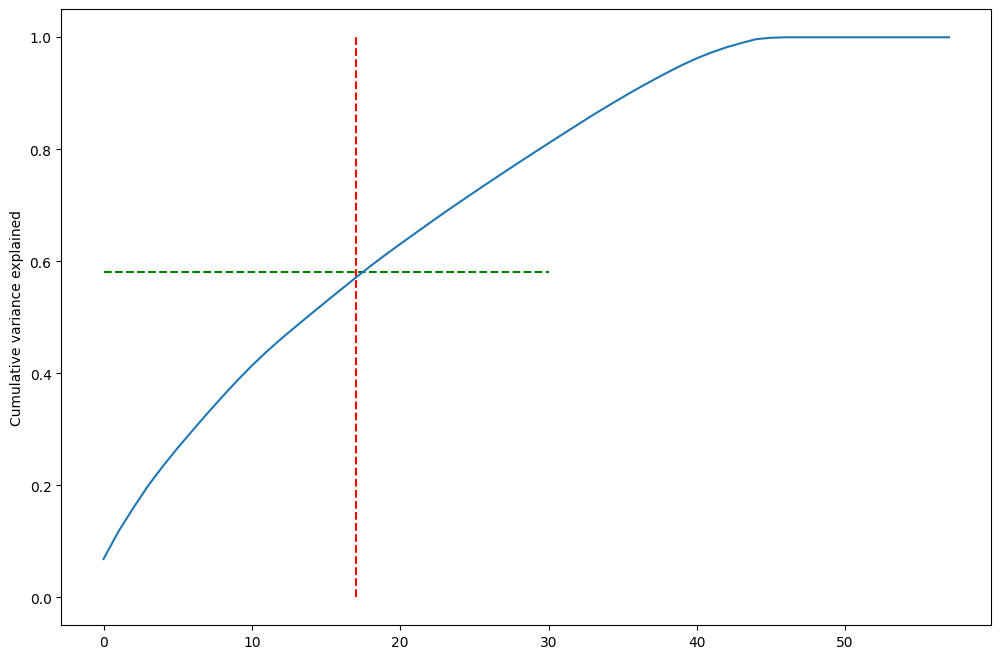

In [72]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=17, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.58, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

### Perform PCA with 18 components

In [73]:
from sklearn.decomposition import IncrementalPCA

In [75]:
pca_final = IncrementalPCA(n_components=18)

In [76]:
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca_hyper = df_train_pca.copy()

In [77]:
df_train_pca.shape

(23065, 18)

In [78]:
corrmat = np.corrcoef(df_train_pca.transpose())
corrmat.shape

(18, 18)

<Axes: >

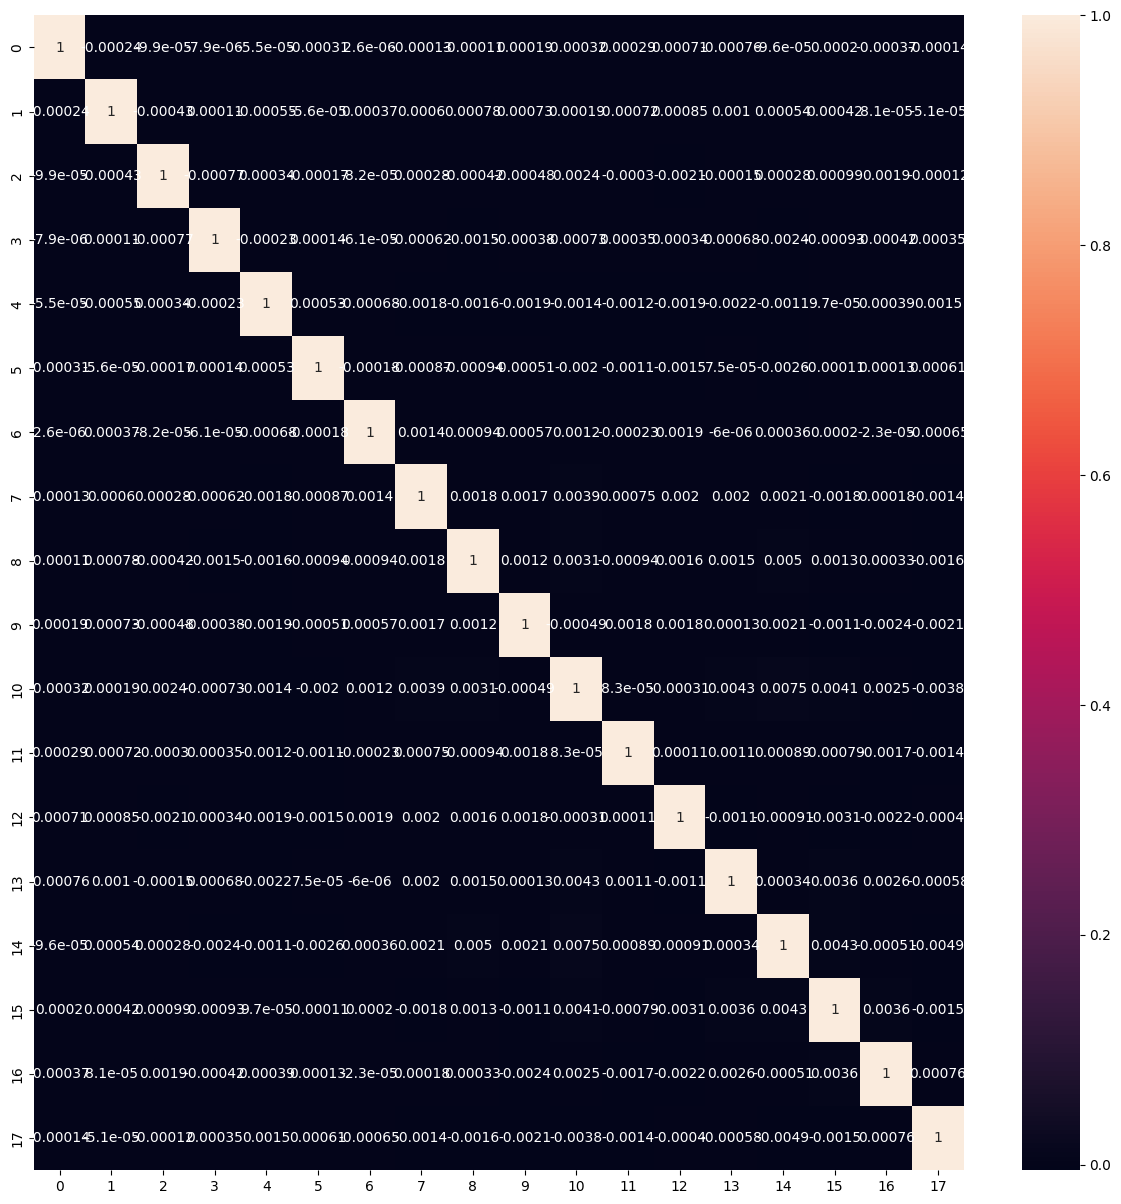

In [79]:
plt.figure(figsize=[15,15])
sns.heatmap(corrmat, annot=True)

### Multicollinearity Test - No multicollinearity exits in the trained PCA dataset

### Applying the PCA transformation on the test set X_test

In [80]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(9885, 18)

In [81]:
df_test_pca


array([[ 296.6587394 , -220.22872999,  126.2748181 , ...,   -6.57346204,
          -9.35370015,    7.08224712],
       [ 295.45466891, -217.1820813 ,  124.77452459, ...,   26.93786109,
         -18.16516617,    2.04992251],
       [ 287.24789561, -215.14911173,  119.47720955, ...,   97.8332068 ,
         -36.8635605 ,   -8.69750912],
       ...,
       [ 293.30502399, -219.75846755,  123.86594515, ...,   30.69912762,
         -19.12433976,    1.58726882],
       [ 294.35404533, -227.18654703,  117.74514788, ...,    3.69410639,
         -11.26637723,    6.09027672],
       [ 293.85344574, -222.09726812,  123.2199588 , ...,   20.60176446,
         -16.16175054,    3.25363661]])

### Logistic Regression  

#### Objective: Identifying important predictor attributes which help the business understand indicators of defaulters. A good choice to identify important variables is a logistic regression model or a model from the tree family. In case of logistic regression, make sure to handle multi-collinearity.

##### Hanlde Imbalance - using parameter class-weight = "balance" with LogisticRegression(x,y, class-weight = "balance")
  
Features :PCA Components

Input : PCA Trained fit Model

### Applying logistic regression on the PCA-train data on the Principal components

In [82]:

from sklearn.linear_model import LogisticRegression
learner_pca = LogisticRegression(class_weight='balanced')

model_pca = learner_pca.fit(df_train_pca, y_train)


### Making predictions on the test set which is transformed by PCA

#### Calculate the Model Accuracy Scoe



In [83]:
# Predict Test data
pred_probs_test = model_pca.predict_proba(df_test_pca)

# Calculating the Model score using AUC

"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'0.87'

In [84]:
pred_probs_test

array([[1.00000000e+000, 6.97896221e-135],
       [1.00000000e+000, 8.56626310e-119],
       [1.00000000e+000, 3.61072060e-084],
       ...,
       [1.00000000e+000, 8.25416636e-117],
       [1.00000000e+000, 4.28895646e-131],
       [1.00000000e+000, 3.97888770e-122]])

### Model Evaluation

#### Calculate CONFUSION MATRIXS - precision , recal & accuracy score, ROC curve,

In [87]:
# # Let's take a look at the confusion matrix again
# confusion = metrics.confusion_matrix(pred_probs_test, pred_probs_train )
# confusion

In [94]:

# Converting y_pred to a dataframe which is an array
pred_probs_test_df = pd.DataFrame(pred_probs_test)
# Converting to column dataframe
pred_probs_test_1 = pred_probs_test_df.iloc[:,[1]]
# Let's see the head
pred_probs_test_1.head()

,1
0,6.978962e-135
1,8.566263e-119
2,3.610721e-84
3,1.315346e-118
4,9.604050e-01


In [107]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.rename(columns={y_test_df.columns[0]: 'target'}, inplace=True)
y_test_df.head()

,target
0,0
1,0
2,0
3,1
4,1


In [108]:
# Putting Mobile Number to index
y_test_df['identity_number'] = y_test_df.index
# Removing index for both dataframes to append them side by side
pred_probs_test_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and pred_probs_test_1
y_pred_final = pd.concat([y_test_df,pred_probs_test_1],axis=1)
# Renaming the column
y_pred_final= y_pred_final.rename(columns={ 1 : 'credit_Prob'})

y_pred_final.head()

,target,identity_number,credit_Prob
0,0,0,6.978962e-135
1,0,1,8.566263e-119
2,0,2,3.610721e-84
3,1,3,1.315346e-118
4,1,4,9.604050e-01


In [109]:
y_test_df.index

RangeIndex(start=0, stop=9885, step=1)

In [110]:
# Creating new column 'predicted' with 1 if credit_Prob>0.5 else 0
y_pred_final['predicted'] = y_pred_final.credit_Prob.map( lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_pred_final.head()

,target,identity_number,credit_Prob,predicted
0,0,0,6.978962e-135,0
1,0,1,8.566263e-119,0
2,0,2,3.610721e-84,0
3,1,3,1.315346e-118,0
4,1,4,9.604050e-01,1


In [111]:
# Confusion matrix
confusion = metrics.confusion_matrix( y_pred_final.target, y_pred_final.predicted )
confusion

array([[8584,  187],
       [ 782,  332]])

In [112]:
#Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.target, y_pred_final.predicted)

0.9019726858877086

In [113]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

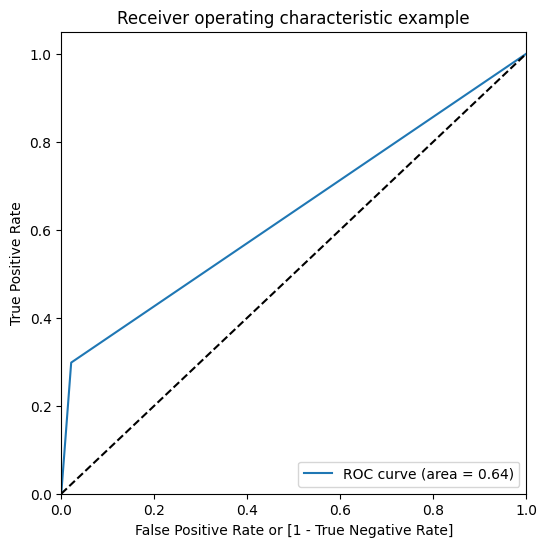

(array([0.        , 0.02132026, 1.        ]),
 array([0.        , 0.29802513, 1.        ]),
 array([2, 1, 0]))

In [114]:
draw_roc(y_pred_final.target, y_pred_final.predicted)

In [116]:
#draw_roc(y_pred_final.target, y_pred_final.predicted)

accuracy = "{:2.2f}".format(metrics.roc_auc_score(y_pred_final.target, y_pred_final.credit_Prob))
accuracy

'0.87'

### Precision Score

TP / TP + FP


In [118]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score
precision = round(precision_score(y_pred_final.target, y_pred_final.predicted), 4)
precision

0.6397

### Recall Score


In [119]:
recall = round(recall_score(y_pred_final.target, y_pred_final.predicted), 4)
recall

0.298

In [121]:
print("***************PCA Trained Logistic Regression Model Performance *****************")
print ("Accuracy: ", accuracy)
print ("Precision: ", precision)
print ("Recall: ", recall)

print("\n***************This is the Final high performance PCA Model to predict the credit risk of the customer *****************")

***************PCA Trained Logistic Regression Model Performance *****************
Accuracy:  0.87
Precision:  0.6397
Recall:  0.298

***************This is the Final high performance PCA Model to predict the credit risk of the customer *****************


### The business problem needs to identify defaults properly, so it is important to identify True Positive.

#### Hence Recall score is higher the better, so there is a trade off , Precision score will go down.

#### Our PCA Model -1  is showing a dscent Recall Score = 66% after handling the imbalance with stratify & class weight = balanced.

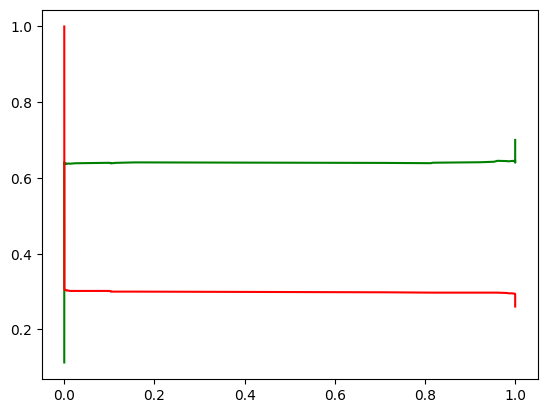

In [124]:
from sklearn.metrics import precision_recall_curve
y_pred_final.target, y_pred_final.predicted
p, r, thresholds = precision_recall_curve(y_pred_final.target, y_pred_final.credit_Prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Model-2 without PCA -> RFE /VIF  & Model - Decision Tree

PCA usually creates components which are not easy to interpret. Therefore, building another model with the main objective of identifying important predictor attributes which help the business understand indicators of credit defaults.

#### A good choice to identify important variables is a DecisionTree Model.

Target : Feature Selection approx : 10 or 15
Good Predictive Model with high Interpretability

#### Handle imbalance data using proper parameter.



In [125]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE

from six import StringIO
# Importing required packages for visualization
from IPython.display import Image
#from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [126]:
# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree


# Create the parameter grid
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid,
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             verbose=1)

In [127]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.9064816822024712
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


In [128]:
dt_tuned = DecisionTreeClassifier(max_depth=5,min_samples_leaf=50, min_samples_split=50)

In [131]:
# Assuming dt_tuned is the decision tree model
rfe = RFE(estimator=dt_tuned, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [135]:
selected_features = list(zip(X.columns, rfe.support_, rfe.ranking_))

In [136]:
selected_features

[('age', True, 1),
 ('duration', True, 1),
 ('campaign', True, 1),
 ('pdays', True, 1),
 ('previous', False, 3),
 ('job_admin.', False, 2),
 ('job_blue-collar', True, 1),
 ('job_entrepreneur', True, 1),
 ('job_housemaid', False, 12),
 ('job_management', False, 13),
 ('job_retired', False, 14),
 ('job_self-employed', False, 16),
 ('job_services', False, 20),
 ('job_student', False, 22),
 ('job_technician', False, 24),
 ('job_unemployed', False, 25),
 ('job_unknown', False, 23),
 ('marital_divorced', False, 18),
 ('marital_married', False, 11),
 ('marital_single', False, 26),
 ('marital_unknown', False, 28),
 ('education_basic.4y', False, 30),
 ('education_basic.6y', False, 32),
 ('education_basic.9y', True, 1),
 ('education_high.school', False, 36),
 ('education_illiterate', False, 38),
 ('education_professional.course', False, 40),
 ('education_university.degree', False, 42),
 ('education_unknown', False, 44),
 ('default_no', False, 43),
 ('default_unknown', False, 41),
 ('default_yes'

In [138]:
col = X.columns[rfe.support_]
col

Index(['age', 'duration', 'campaign', 'pdays', 'job_blue-collar',
       'job_entrepreneur', 'education_basic.9y', 'housing_no', 'loan_yes',
       'contact_telephone', 'month_mar', 'month_may', 'month_nov', 'month_sep',
       'day_of_week_fri'],
      dtype='object')

In [139]:
X.columns[~rfe.support_]

Index(['previous', 'job_admin.', 'job_housemaid', 'job_management',
       'job_retired', 'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown', 'marital_divorced',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_basic.4y', 'education_basic.6y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_unknown', 'housing_yes',
       'loan_no', 'loan_unknown', 'contact_cellular', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_oct', 'day_of_week_mon',
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed',
       'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')